**20110160 - ML_Prerequsite test**

In [71]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import time
import random

**1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

To perform a matrix multiplication between a (n, k) and (k, m) matrix, each element in the resulting (n, m) matrix requires k multiplications and k-1 additions. 

Since there are n * m elements in the final matrix, the total number of multiplications is n * m * k, and the total number of additions is (n * m * (k-1)) + (n * (m-1)).

**2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [72]:
def multiply_matrices_lists(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

def multiply_matrices_numpy(A, B):
    return np.dot(A, B)

A = [[1, 2, 3], [4, 5, 6]]
B = [[7, 8], [9, 10], [11, 12]]

start_time = time.time()
result_lists = multiply_matrices_lists(A, B)
print("List multiplication result:")
print(result_lists)
print("List multiplication time:", time.time() - start_time)

# Timing
A_np = np.array(A)
B_np = np.array(B)
start_time = time.time()
result_numpy = multiply_matrices_numpy(A_np, B_np)
print("\nNumPy multiplication result:")
print(result_numpy)
print("NumPy multiplication time:", time.time() - start_time)


List multiplication result:
[[58, 64], [139, 154]]
List multiplication time: 0.0

NumPy multiplication result:
[[ 58  64]
 [139 154]]
NumPy multiplication time: 0.0


NumPy operations tend to be faster than native Python operations because NumPy is optimized and implemented in C. The array operations in NumPy are highly vectorized, allowing for efficient computations on large datasets. Therefore, the NumPy solution is likely to be faster than the list-based solution for matrix multiplication.

**3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

In [73]:
# Method 1: Finding median using repeated passes
def find_median_passes(arr):
    n = len(arr)
    for _ in range(n // 2):
        max_val = max(arr)
        arr.remove(max_val)
        second_max = max(arr)
        arr.remove(second_max)
    return min(arr)

# Method 2: Finding median using sorting
def find_median_sort(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 0:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
    else:
        return sorted_arr[n // 2]

# array
arr = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]

# Timing for finding median using repeated passes
start_time = time.time()
median_passes = find_median_passes(arr.copy())
print("Median (passes):", median_passes)
print("Time taken (passes):", time.time() - start_time)

# Timing for finding median using sorting
start_time = time.time()
median_sort = find_median_sort(arr.copy())
print("\nMedian (sorting):", median_sort)
print("Time taken (sorting):", time.time() - start_time)

# Timing for NumPy median
start_time = time.time()
median_numpy = np.median(arr)
print("\nMedian (NumPy):", median_numpy)
print("Time taken (NumPy):", time.time() - start_time)


Median (passes): 1
Time taken (passes): 0.0

Median (sorting): 4
Time taken (sorting): 0.0

Median (NumPy): 4.0
Time taken (NumPy): 0.06163358688354492


**4) What is the gradient of the following function with respect to x and y?**
$$x^2y + y^3sinx$$

Here,    $$f(x) = x^2y + y^3sinx$$

Now,
  Gradient of $f(x)$ with respect to x: $$ 2xy + y^3 cosx $$
      Gradient of $f(x)$ with respect to y: $$ x^2 + 3y^2 sinx $$ 
:

 


**5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [5]:
import jax
import jax.numpy as jnp

# Define the function
def my_function(x, y):
    u = x**2 * y
    v = y**3 * jnp.sin(x)
    return u + v

# Define the analytical gradient
def analytical_gradient(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return jnp.array([df_dx, df_dy])

# Use JAX's automatic differentiation to compute the gradient
grad_fn = jax.grad(my_function)

# Random values for x and y
random_x = 2.0
random_y = 1.5

# Compute gradients
analytical_grad = analytical_gradient(random_x, random_y)
jax_grad = grad_fn(random_x, random_y)

# Print the results
print("Analytical Gradient:", analytical_grad)
print("JAX Gradient:", jax_grad)

# Check if the results match
assert jnp.allclose(analytical_grad, jax_grad), "Gradients do not match"


ModuleNotFoundError: jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.

**6) Use sympy to confirm that you obtain the same gradient analytically.**

In [1]:
pip install sympy
from sympy import symbols, diff, sin

# Define symbols
x, y = symbols('x y')

# Define the function
f = x**2 * y + y**3 * sin(x)

# Compute the partial derivatives
df_dx = diff(f, x)
df_dy = diff(f, y)

# Display the symbolic expressions for the partial derivatives
print("Analytical Gradient:")
print(f"df/dx = {df_dx}")
print(f"df/dy = {df_dy}")


ModuleNotFoundError: No module named 'sympy'

**7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:**

In [42]:
students_data = {
    2022: {
        'Branch 1': {
            1: {
                'Name': 'Naresh',
                'Marks': {
                    'Maths': 100,
                    'English': 70
                }
            },
            2: {
                'Name': 'Sanjay',
                'Marks': {
                    'Maths': 50,
                    'English': 89
                }
            }
        },
        'Branch 2': {}
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    }
}

In [43]:
print(students_data)

{2022: {'Branch 1': {1: {'Name': 'Naresh', 'Marks': {'Maths': 100, 'English': 70}}, 2: {'Name': 'Sanjay', 'Marks': {'Maths': 50, 'English': 89}}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


**8) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [51]:
class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

    def add_subject_mark(self, subject, mark):
        self.marks[subject] = mark

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

# Example usage:
students_db = []

# Creating students
student1 = Student(1, 'Naresh')
student1.add_subject_mark('Maths', 100)
student1.add_subject_mark('English', 70)

student2 = Student(2, 'Sanjay')
student2.add_subject_mark('Maths', 50)
student2.add_subject_mark('English', 89)

# Creating branches
branch1 = Branch('Branch 1')
branch1.add_student(student1)
branch1.add_student(student2)

branch2 = Branch('Branch 2')

# Creating years
year2022 = Year(2022)
year2022.add_branch(branch1)
year2022.add_branch(branch2)

year2023 = Year(2023)
year2024 = Year(2024)
year2025 = Year(2025)

students_db.append(year2022)
students_db.append(year2023)
students_db.append(year2024)
students_db.append(year2025)


In [60]:
for year in students_db:
    print(f"Year:{year.year}")
    for branch in year.branches:
        print(f"  Branch: {branch.name}")
        for student in branch.students:
            print(f"      Student: {student.name}, Roll Number: {student.roll_number}")
            print("      Marks:")
            for subject, mark in student.marks.items():
                print(f"          {subject}: {mark}")

Year:2022
  Branch: Branch 1
      Student: Naresh, Roll Number: 1
      Marks:
          Maths: 100
          English: 70
      Student: Sanjay, Roll Number: 2
      Marks:
          Maths: 50
          English: 89
  Branch: Branch 2
Year:2023
Year:2024
Year:2025


**9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

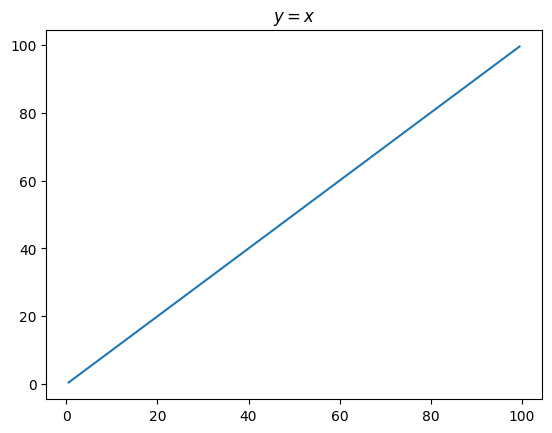

In [8]:
y1 = np.arange(0.5,100.0,0.5)
plt.title("$y = x$")
plt.plot(y1,y1)
plt.show()

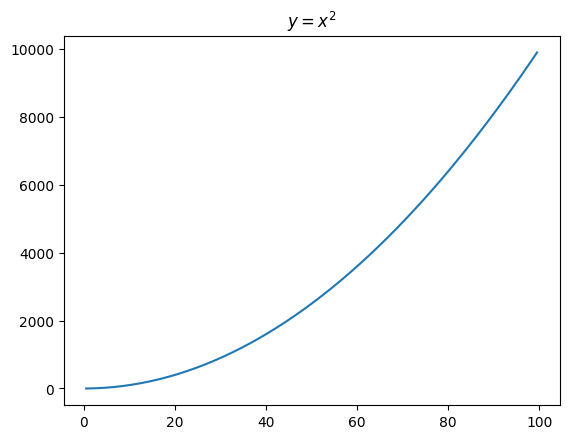

In [11]:
y2 = y1**2
plt.title("$y = x^2$")
plt.plot(y1, y2)
plt.show()

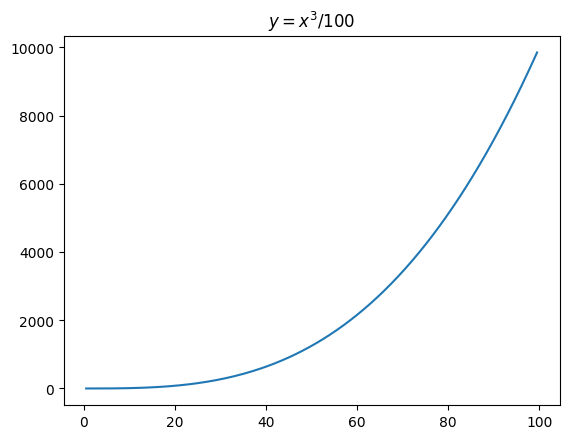

In [20]:
y3 = (y1**3)/100
plt.plot(y1, y3)
plt.title("$y = x^3/100$")
plt.show()

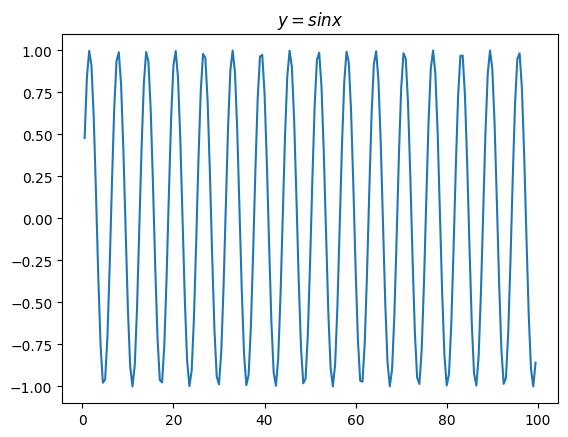

In [21]:
y4 = np.sin(y1)
plt.plot(y1, y4)
plt.title("$y=sin x $")
plt.show()

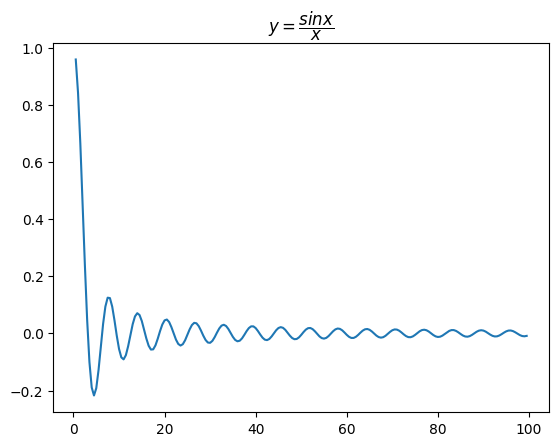

In [22]:
y5 = np.sin(y1)/y1
plt.plot(y1, y5)
plt.title(r"$y=\dfrac{sin x}{x}$")
plt.show()

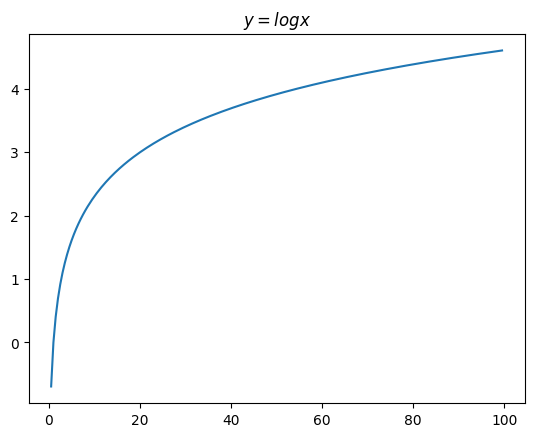

In [28]:
y6 = np.log(y1)
plt.plot(y1, y6)
plt.title("$y = log x $")
plt.show()

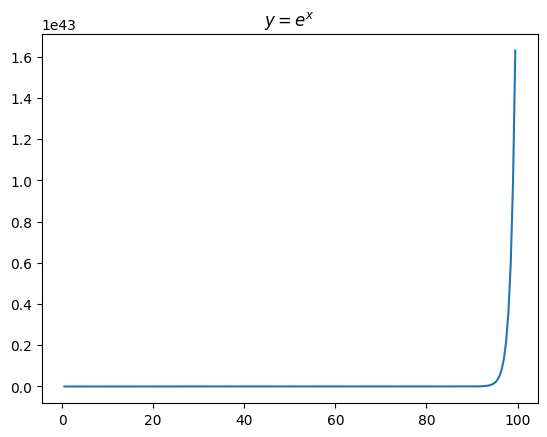

In [29]:
y7 =  np.exp(y1)
plt.plot(y1, y7)
plt.title("$ y=e^x$")
plt.show()

**10) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:**

In [65]:
# Generate a matrix of size 20x5 with random numbers in the range of 1 to 2
np.random.seed(42)  # Setting seed for reproducibility
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame with the generated matrix
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Find the column with the highest standard deviation
max_std_column = df.std().idxmax()

# Find the row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()

import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 with random numbers in the range of 1 to 2
np.random.seed(42)  # Setting seed for reproducibility
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame with the generated matrix
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Find the column with the highest standard deviation
max_std_column = df.std().idxmax()

# Find the row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()

import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 with random numbers in the range of 1 to 2
np.random.seed(42)  # Setting seed for reproducibility
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame with the generated matrix
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Find the column with the highest standard deviation
max_std_column = df.std().idxmax()

# Find the row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()

# Print the DataFrame and results
print("DataFrame:")
print(df)
print("\nColumn with the highest standard deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)


DataFrame:
           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1

**11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [66]:
# Generate a matrix of size 20x5 with random numbers in the range of 1 to 2
np.random.seed(42)
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame with the generated matrix
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in column "g" is "LT8"
num_lt8_rows = df[df['g'] == 'LT8'].shape[0]

# Find the standard deviation of column "f" for rows where "g" is "LT8" and "GT8"
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

print("Updated DataFrame:")
print(df)
print("\nNumber of rows where the value in column 'g' is 'LT8':", num_lt8_rows)
print("Standard deviation of column 'f' for rows where 'g' is 'LT8':", std_lt8)
print("Standard deviation of column 'f' for rows where 'g' is 'GT8':", std_gt8)


Updated DataFrame:
           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802

**12) Write a small piece of code to explain broadcasting in numpy.**

In [67]:
import numpy as np

arr1 = np.array([1, 2, 3])
arr2 = 2

result = arr1 + arr2

print("Array 1:", arr1)
print("Scalar (arr2):", arr2)
print("Result after broadcasting:", result)


Array 1: [1 2 3]
Scalar (arr2): 2
Result after broadcasting: [3 4 5]


**13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [70]:
def custom_argmin(arr):
    return np.argmin(arr)

# Test the custom argmin function
arr = np.array([4, 2, 7, 1, 9, 3])
custom_result = custom_argmin(arr)

# Verify with np.argmin
np_result = np.argmin(arr)

print("Custom argmin result:", custom_result)
print("NumPy argmin result:", np_result)

# Check if the results match
assert custom_result == np_result, "Results do not match"


Custom argmin result: 3
NumPy argmin result: 3
